# Exercise 10.1 

# tomato-or-apple with custom loss function

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
!ls /content/gdrive

In [15]:
#changing the working directory
%cd /content/gdrive/My Drive/Datasets
#Check the present working directory using pwd command

In [17]:
!ls 

apple  tomato


In [14]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  apple-or-tomato.zip
   creating: apple-or-tomato/test_set/
   creating: apple-or-tomato/test_set/apple/
  inflating: apple-or-tomato/test_set/apple/apple (1).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (10).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (100).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (101).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (102).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (103).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (104).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (105).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (106).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (107).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (108).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (109).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (11).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (110).jpg  
  inflating: apple-or-

In [4]:
training_data = []

In [5]:
img_size = 100

In [6]:
assign_dict = {"apple":0, "tomato":1}

In [32]:
directory = "/content/gdrive/My Drive/Datasets/apple-or-tomato/training_set"

In [22]:
import os
import matplotlib.pyplot as plt

In [23]:
for sub_directory in os.listdir(directory):
    inner_directory = os.path.join(directory, sub_directory)
    for i in os.listdir(inner_directory):
        try:
            img = plt.imread(os.path.join(inner_directory,i),1)
            training_data.append([img, assign_dict[sub_directory]])
        except:
            pass

In [24]:
import random
random.shuffle(training_data)

In [25]:
print(training_data[0])

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [26]:
len(training_data)

1300

In [27]:
import seaborn as sns

In [28]:
sns.set_style('whitegrid')

In [29]:
f = []

In [30]:
for fruit in training_data:
    if(fruit[1] == 0):
        f.append("Apple")
    else:
        f.append("Tomato")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


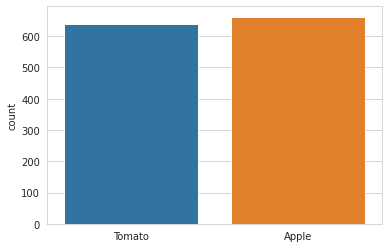

In [31]:
sns.countplot(f);

In [32]:
testing_data = []

In [35]:
directory = "/content/gdrive/My Drive/Datasets/apple-or-tomato/test_set"

In [36]:
for sub_directory in os.listdir(directory):
    inner_directory = os.path.join(directory,sub_directory)
    for i in os.listdir(inner_directory):
        try:
            img = plt.imread(os.path.join(inner_directory,i),1)
            testing_data.append([img,assign_dict[sub_directory]])
        except:
            pass

In [37]:
len(testing_data)

648

In [38]:
X_train = []
y_train = []
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

In [39]:
import numpy as np
X_train = np.array(X_train)/255.0

In [40]:
X_train = X_train.reshape(-1,100,100,3)
y_train = np.array(y_train)

In [41]:
X_test = []
y_test = []
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

In [42]:
X_test = np.array(X_test)/255.0
X_test = X_test.reshape(-1,100,100,3)
y_test = np.array(y_test)

In [43]:
w=10
h=10
fig=plt.figure(figsize=(10,10))
columns = 4
rows = 4

<Figure size 720x720 with 0 Axes>

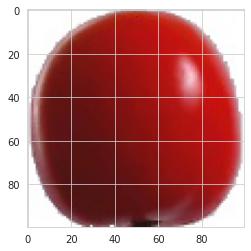

In [44]:
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img))
plt.show()

In [45]:
import tensorflow as tf

In [46]:
# custom loss here
# https://neptune.ai/blog/keras-loss-functions


def custom_loss_function(y_true, y_pred):
   print("y_pred ",y_pred)
   print("y_true ", y_true)
   squared_difference = tf.square(float(y_true)-float(y_pred))
   return tf.reduce_mean(squared_difference, axis=-1)
 #  model.compile(optimizer='adam', loss=custom_loss_function)

In [47]:
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,Add, AveragePooling2D, Flatten, Dense

In [48]:
def relu_batchnorm_layer(input):
    return BatchNormalization()(ReLU()(input))

In [49]:
def residual_block(input, downsample: bool, filters: int, kernel_size: int = 3):
    int_output = Conv2D(filters=filters, kernel_size=kernel_size, 
                        strides= (1 if not downsample else 2), 
                        padding="same")(input)
    int_output = relu_batchnorm_layer(int_output)
    int_output = Conv2D(filters=filters, kernel_size=kernel_size, 
                        padding="same")(int_output)

    if downsample:
        int_output2 = Conv2D(filters=filters, kernel_size=1, strides=2,
                             padding="same")(input)
        output = Add()([int_output2, int_output]) 
    else:
        output = Add()([input, int_output])

    output = relu_batchnorm_layer(output)
    return output

In [50]:
from tensorflow.keras.models import Model

In [51]:
inputs = Input(shape=(100, 100, 3))
num_filters = 32
    
t = BatchNormalization()(inputs)
t = Conv2D(kernel_size=3,
           strides=1,
           filters=32,
           padding="same")(t)
t = relu_batchnorm_layer(t)
    
num_blocks_list = [1, 3, 5, 6, 1]
for i in range(len(num_blocks_list)):
    num_blocks = num_blocks_list[i]
    for j in range(num_blocks):
        t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
    num_filters *= 2
    
t = AveragePooling2D(4)(t)
t = Flatten()(t)
outputs = Dense(1, activation='sigmoid')(t)
    
model = Model(inputs, outputs)

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 100, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 32) 896         batch_normalization[0][0]        
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 100, 100, 32) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [53]:
model.compile(
        optimizer='adam',
        loss=custom_loss_function,
        metrics=['accuracy']
    )

In [54]:
print(tf.__version__)

2.5.0


In [67]:
history=model.fit(X_train,y_train,batch_size = 32,epochs=10,validation_split = 0.1)

Epoch 1/10
y_pred  Tensor("model/dense/Sigmoid:0", shape=(None, 1), dtype=float32)
y_true  Tensor("ExpandDims:0", shape=(None, 1), dtype=int64)
y_pred  Tensor("model/dense/Sigmoid:0", shape=(None, 1), dtype=float32)
y_true  Tensor("ExpandDims:0", shape=(None, 1), dtype=int64)
37/37 [==============================] - ETA: 0s - loss: 0.1669 - accuracy: 0.8214y_pred  Tensor("model/dense/Sigmoid:0", shape=(None, 1), dtype=float32)
y_true  Tensor("ExpandDims:0", shape=(None, 1), dtype=int64)
37/37 [==============================] - 43s 206ms/step - loss: 0.1669 - accuracy: 0.8214 - val_loss: 0.5846 - val_accuracy: 0.4154
Epoch 2/10
37/37 [==============================] - 6s 157ms/step - loss: 0.1267 - accuracy: 0.8615 - val_loss: 0.5846 - val_accuracy: 0.4154
Epoch 3/10
37/37 [==============================] - 6s 158ms/step - loss: 0.0524 - accuracy: 0.9436 - val_loss: 0.5846 - val_accuracy: 0.4154
Epoch 4/10
37/37 [==============================] - 6s 159ms/step - loss: 0.0241 - accuracy:

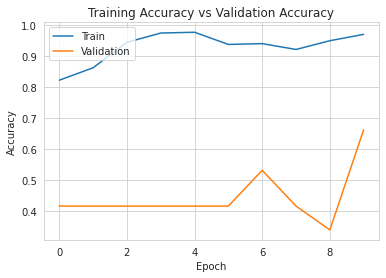

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

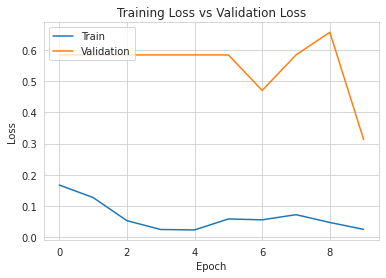

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 0.3085807263851166
Accuracy: 67.12962985038757%
